<a href="https://colab.research.google.com/github/SharviE29/Tweet_Sentiment_Analysis/blob/main/tweet_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
df= pd.read_csv('data_science.csv')

<ipython-input-4-7d515c765f79>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('data_science.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32393 entries, 0 to 32392
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               32393 non-null  int64  
 1   conversation_id  32393 non-null  int64  
 2   created_at       32393 non-null  object 
 3   date             32393 non-null  object 
 4   time             32393 non-null  object 
 5   timezone         32393 non-null  int64  
 6   user_id          32393 non-null  int64  
 7   username         32393 non-null  object 
 8   name             32393 non-null  object 
 9   place            1 non-null      object 
 10  tweet            32393 non-null  object 
 11  language         32393 non-null  object 
 12  mentions         32393 non-null  object 
 13  urls             32393 non-null  object 
 14  photos           32393 non-null  object 
 15  replies_count    32393 non-null  int64  
 16  retweets_count   32393 non-null  int64  
 17  likes_count 

In [6]:
import nltk 

In [8]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
sid= SentimentIntensityAnalyzer()

In [10]:
import re

In [11]:
import pandas as pd
import nltk
nltk.download('words')
words=set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [12]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet)
         if w.lower() in words or not w.isalpha())
    return tweet
    

df['tweet_clean'] = df['tweet'].apply(cleaner)


In [13]:
word_dict = {'manipulate':-1,'manipulative':-1,'jamescharlesiscancelled':-1,'jamescharlesisoverparty':-1,
            'pedophile':-1,'pedo':-1,'cancel':-1,'cancelled':-1,'cancel culture':0.4,'teamtati':-1,'teamjames':1,
            'teamjamescharles':1,'liar':-1}

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sid.lexicon.update(word_dict)

list1 = []
for i in df['tweet_clean']:
    list1.append((sid.polarity_scores(str(i)))['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
df['sentiment'] = pd.Series(list1)

def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

df['sentiment_category'] = df['sentiment'].apply(sentiment_category)

In [15]:
df = df[['tweet','date','id','sentiment','sentiment_category']]
df.head()

,tweet,date,id,sentiment,sentiment_category
0,What can be done? - Never blindly trust an ab...,2021-06-20,1406400408545804288,-0.4592,negative
1,"""We need a paradigm shift from model-centric t...",2021-06-20,1406390341176016897,-0.3535,negative
2,Using high-resolution satellite data and compu...,2021-06-20,1406386311481774083,0.0000,neutral
3,.@Stephenson_Data shares four steps that will ...,2021-06-20,1406383545153638402,0.6249,positive
4,"""Curricula is inherently brittle in a world wh...",2021-06-20,1406358632648818689,0.2960,positive


In [16]:
neg = df[df['sentiment_category']=='negative']
neg = neg.groupby(['date'],as_index=False).count()

pos = df[df['sentiment_category']=='positive']
pos = pos.groupby(['date'],as_index=False).count()

pos = pos[['date','id']]
neg = neg[['date','id']]

In [17]:
import plotly.graph_objs as go

fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['date'], y=pos['id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )

for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['date'], y=neg['id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [18]:
newdf = df[(df['date']>='2019-05-01') & (df['date']<='2019-06-29')]

neg = newdf[newdf['sentiment_category']=='negative']
neg = neg.groupby(['date'],as_index=False).count()

pos = newdf[newdf['sentiment_category']=='positive']
pos = pos.groupby(['date'],as_index=False).count()

pos = pos[['date','id']]
neg = neg[['date','id']]

In [19]:
import plotly.graph_objs as go

fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['date'], y=pos['id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )

for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['date'], y=neg['id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

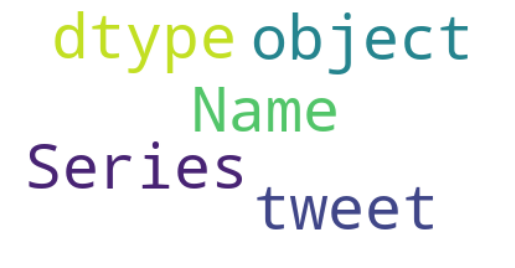

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
df2 = df[(df['date']>='2019-05-11') & (df['date']<='2019-05-14')]
positive = df2[df2['sentiment_category']=='positive']
wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white").generate(str(positive['tweet']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
print(df[df['sentiment_category']=='positive'])

                                                   tweet        date  \
3      .@Stephenson_Data shares four steps that will ...  2021-06-20   
4      "Curricula is inherently brittle in a world wh...  2021-06-20   
6      @LinkLabsInc @IoTchannel Wow! Wonderful!! Cong...  2021-06-20   
9      Demystifying #AI with 10 top applications:  ht...  2021-06-20   
10     Trends in #AI for next 5 years, including reve...  2021-06-20   
...                                                  ...         ...   
32386  How can global health systems benefit from #da...  2020-09-14   
32387  At HERE Directions, learn how you can use our ...  2020-09-14   
32388  Not just #Cloud, the Azure #Serverless Platfor...  2020-09-14   
32389  Harnessing the Power of Exponential Technologi...  2020-09-14   
32391  #DigitalTwins Proliferate as Smart Way to Test...  2020-09-14   

                        id  sentiment sentiment_category  
3      1406383545153638402     0.6249           positive  
4      1406358632

In [22]:
print(df[df['sentiment_category']=='negative'])

                                                   tweet        date  \
0      What can be done?  - Never blindly trust an ab...  2021-06-20   
1      "We need a paradigm shift from model-centric t...  2021-06-20   
5      Many common colour maps distort data through u...  2021-06-20   
19     ApolloScape (world’s largest open-source datas...  2021-06-20   
36     Disruption defines our world, and the latest h...  2021-06-19   
...                                                  ...         ...   
32358  There is no science or data that supports keep...  2020-09-14   
32368  🔬 #BigData und #AI spielen auch im #Labor eine...  2020-09-14   
32375  Melbourne, once the world’s most liveable city...  2020-09-14   
32376  To treat science as fiction (covid, climate ch...  2020-09-14   
32385  China is using big data science and technology...  2020-09-14   

                        id  sentiment sentiment_category  
0      1406400408545804288    -0.4592           negative  
1      1406390341